In [1]:
# Install required libraries quietly (no verbose output)
# pyarrow and pandas for data processing and handling
!pip install pyarrow pandas --quiet
# OpenAI Python client to interact with OpenAI API
!pip install openai --quiet


In [2]:
import pandas as pd
import boto3
import os
from io import BytesIO

# Initialize the AWS S3 client using boto3 to interact with your S3 buckets
s3 = boto3.client('s3')

# Define your S3 bucket name and the folder (prefix) where parquet files are stored
bucket_name = 'mydynas3bucket'
parquet_prefix = 'energy-training/'  # Folder path containing the original parquet files
csv_output_prefix = 'energy-training-csv/'  # Folder path to save converted CSV files

# List all objects in the S3 bucket under the parquet prefix (folder)
response = s3.list_objects_v2(Bucket=bucket_name, Prefix=parquet_prefix)

# Filter to get only the parquet files (files ending with .parquet)
parquet_files = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].endswith('.parquet')]

print(f"Found {len(parquet_files)} parquet files.")

# Loop through each parquet file key
for parquet_file_key in parquet_files:
    print(f"Processing {parquet_file_key}...")
    
    # Download parquet file content into memory (no disk needed)
    parquet_obj = s3.get_object(Bucket=bucket_name, Key=parquet_file_key)
    parquet_content = parquet_obj['Body'].read()
    
    # Load parquet file bytes into a Pandas DataFrame using a bytes buffer
    df = pd.read_parquet(BytesIO(parquet_content))
    
    # Create the corresponding CSV file path by replacing folder prefix and extension
    csv_file_key = parquet_file_key.replace(parquet_prefix, csv_output_prefix).replace('.parquet', '.csv')
    
    # Convert the DataFrame to CSV format, writing to a bytes buffer in memory
    csv_buffer = BytesIO()
    df.to_csv(csv_buffer, index=False)
    
    # Upload the CSV bytes from memory back to S3 under the new key
    s3.put_object(Bucket=bucket_name, Key=csv_file_key, Body=csv_buffer.getvalue())
    
    print(f"Uploaded CSV to {csv_file_key}")

print("All files processed.")


Found 20 parquet files.
Processing energy-training/part-00000-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.parquet...
Uploaded CSV to energy-training-csv/part-00000-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv
Processing energy-training/part-00001-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.parquet...
Uploaded CSV to energy-training-csv/part-00001-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv
Processing energy-training/part-00002-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.parquet...
Uploaded CSV to energy-training-csv/part-00002-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv
Processing energy-training/part-00003-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.parquet...
Uploaded CSV to energy-training-csv/part-00003-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv
Processing energy-training/part-00004-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.parquet...
Uploaded CSV to energy-training-csv/part-00004-5527946e-4b87-493e-acde-2fb715d3c1a7-c0

In [3]:
import boto3
import pandas as pd

bucket = 'mydynas3bucket'
csv_prefix = 'energy-training-csv/'

# Initialize boto3 S3 client
s3 = boto3.client('s3')

# List all CSV files in the S3 bucket under the specified CSV folder (prefix)
response = s3.list_objects_v2(Bucket=bucket, Prefix=csv_prefix)
csv_files = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].endswith('.csv')]

print(f"Found {len(csv_files)} CSV files.")

# Dictionary to hold DataFrames for each CSV file keyed by filename
dataframes = {}

# Loop over each CSV file key
for csv_key in csv_files:
    print(f"Downloading and loading {csv_key}...")
    
    # Download the CSV file content directly from S3
    obj = s3.get_object(Bucket=bucket, Key=csv_key)
    
    # Read CSV content into a Pandas DataFrame
    df = pd.read_csv(obj['Body'])
    
    # Use just the filename (remove the folder prefix) as the dictionary key
    file_name = csv_key.replace(csv_prefix, '')
    dataframes[file_name] = df
    
    print(f"Loaded {file_name} with {len(df)} rows.")

print(f"Loaded {len(dataframes)} CSV files into memory.")

# Example usage:
# You can access any loaded DataFrame by filename, e.g.,
# print(dataframes['part-00004-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv'].head())


Found 20 CSV files.
Loaded part-00000-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00001-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00002-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00003-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00004-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00005-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00006-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00007-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00008-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00009-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00010-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00011-5527946e-4b87-493e-acde-2fb

In [4]:
import boto3
import pandas as pd

def load_csv_files_from_s3(bucket: str, prefix: str):
    """
    Connect to an S3 bucket and load all CSV files found under a given prefix/folder.
    Returns a dictionary of DataFrames keyed by the CSV filenames.
    """
    s3 = boto3.client('s3')
    
    # List all objects under the prefix in the bucket
    response = s3.list_objects_v2(Bucket=bucket, Prefix=prefix)
    
    # Filter only CSV files
    csv_files = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].endswith('.csv')]
    
    print(f"Found {len(csv_files)} CSV files in {bucket}/{prefix}")
    
    dataframes = {}
    
    for csv_key in csv_files:
        print(f"Downloading and loading {csv_key}...")
        # Download CSV file object from S3
        obj = s3.get_object(Bucket=bucket, Key=csv_key)
        
        # Read CSV content into a DataFrame
        df = pd.read_csv(obj['Body'])
        
        # Use the file name (remove prefix) as dictionary key
        file_name = csv_key.replace(prefix, '')
        dataframes[file_name] = df
        
        print(f"Loaded {file_name} with {len(df)} rows.")
    
    print(f"All {len(dataframes)} CSV files loaded into memory.")
    return dataframes

# Constants for your S3 bucket and CSV folder
BUCKET_NAME = 'mydynas3bucket'
CSV_PREFIX = 'energy-training-csv/'

# Call the function to load all CSVs into a dict of DataFrames
dfs = load_csv_files_from_s3(BUCKET_NAME, CSV_PREFIX)

# Show a preview of one of the loaded DataFrames
example_file = next(iter(dfs))
print(f"\nExample DataFrame ({example_file}):")
display(dfs[example_file].head())


Found 20 CSV files in mydynas3bucket/energy-training-csv/
Loaded part-00000-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00001-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00002-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00003-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00004-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00005-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00006-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00007-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00008-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00009-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded part-00010-5527946e-4b87-493e-acde-2fb715d3c1a7-c000.snappy.csv with 48 rows.
Loaded 

,energy_kWh,household_id,timestamp
0,3.679,2,2025-06-15T18:03:37.182668
1,1.497,2,2025-06-16T04:03:37.182668
2,1.933,2,2025-06-16T14:03:37.182668
3,1.102,2,2025-06-17T00:03:37.182668
4,2.110,2,2025-06-17T10:03:37.182668


In [5]:
import numpy as np

# Combine all the individual DataFrames loaded earlier into one large DataFrame.
# This is helpful if all CSVs have the same structure (columns) and you want to analyze the full dataset at once.
combined_df = pd.concat(dfs.values(), ignore_index=True)

print(f"Combined data shape: {combined_df.shape}")  # Print the number of rows and columns in combined data

# Generate basic summary statistics (count, mean, std, min, max, quartiles) for all numeric columns.
print(combined_df.describe())

# Example check for a specific sustainability-related column, e.g., 'power_kW' (adjust to your actual data).
if 'power_kW' in combined_df.columns:
    avg_power = combined_df['power_kW'].mean()
    print(f"Average power usage: {avg_power}")


Combined data shape: (960, 3)
       energy_kWh  household_id
count  960.000000    960.000000
mean     2.091427      5.500000
std      0.901674      2.873778
min      0.555000      1.000000
25%      1.465000      3.000000
50%      1.906500      5.500000
75%      2.526000      8.000000
max      4.904000     10.000000


Average energy usage (kWh): 2.0914270833333335
Max energy usage (kWh): 4.904
Min energy usage (kWh): 0.555


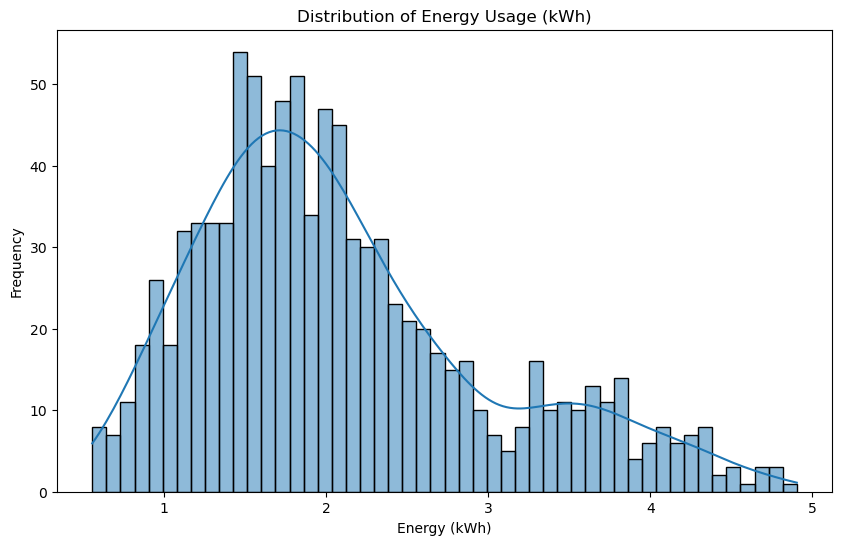

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot a histogram with kernel density estimate (KDE) overlaid for the 'energy_kWh' column
sns.histplot(combined_df['energy_kWh'], bins=50, kde=True)

# Add a title to the plot
plt.title('Distribution of Energy Usage (kWh)')

# Print key summary statistics to the console for quick reference
print(f"Average energy usage (kWh): {combined_df['energy_kWh'].mean()}")
print(f"Max energy usage (kWh): {combined_df['energy_kWh'].max()}")
print(f"Min energy usage (kWh): {combined_df['energy_kWh'].min()}")

# Label the x-axis and y-axis for clarity
plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')

# Display the plot
plt.show()


In [7]:
import os
from openai import OpenAI
# Set your OpenAI API key as an environment variable.
# Replace the placeholder string with your actual API key.
os.environ["OPENAI_API_KEY"] = "sk-*****"
# Initialize the OpenAI client.
# The client automatically reads the API key from the environment variable.
client = OpenAI()


In [8]:
# ai_suggestions.py

import os
from openai import OpenAI

def get_energy_suggestions(avg_energy, min_energy, max_energy):
    """
    Generate actionable sustainability insights from OpenAI's GPT model
    based on provided energy usage statistics.
    """

    # Make sure your OPENAI_API_KEY is set in your environment variables:
    # export OPENAI_API_KEY="sk-xxxx"
    # or set it here programmatically (not recommended for security reasons):
    # os.environ["OPENAI_API_KEY"] = "sk-xxxx"

    # Initialize the OpenAI client
    client = OpenAI()

    # Construct the prompt for the AI with key energy statistics
    prompt = f"""
    I have energy usage data for 960 households.
    Average usage: {avg_energy:.2f} kWh.
    Min usage: {min_energy:.2f} kWh.
    Max usage: {max_energy:.2f} kWh.

    Please provide 5 actionable insights and concrete suggestions
    for when and how to reduce energy usage to improve sustainability.
    """

    # Call the OpenAI Chat Completion API with the prompt
    response = client.chat.completions.create(
        model="gpt-4o-mini",   # Use your preferred model here
        messages=[
            {"role": "system", "content": "You are a sustainability and energy expert."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=500,
        temperature=0.7,  # Controls creativity/randomness of output
    )

    # Return the AI's generated insights
    return response.choices[0].message.content


# If running this script directly, test the function with sample data
if __name__ == "__main__":
    average_energy = 2.09  # Replace with actual average energy from your data
    min_energy = 0.55      # Replace with actual minimum energy from your data
    max_energy = 4.90      # Replace with actual maximum energy from your data

    suggestions = get_energy_suggestions(average_energy, min_energy, max_energy)
    print("=== AI Suggestions ===")
    print(suggestions)


=== AI Suggestions ===
Reducing energy usage in households not only contributes to sustainability but also helps in lowering energy bills for residents. Here are five actionable insights and concrete suggestions based on the provided energy usage data:

### 1. **Identify and Target High Usage Households**
   - **Actionable Insight:** With a maximum usage of 4.90 kWh, there are likely households consuming significantly more energy than average (2.09 kWh). 
   - **Suggestion:** Conduct an energy audit for households that fall within the top 20% of energy usage. Provide personalized recommendations on energy-saving practices, such as upgrading to energy-efficient appliances, improving insulation, and using smart thermostats.

### 2. **Promote Energy-Efficient Appliances**
   - **Actionable Insight:** Households with lower energy usage (close to the minimum of 0.55 kWh) might be using outdated appliances or less efficient technologies.
   - **Suggestion:** Initiate a community program to i